## Multiple Linear Regression Assignment 

Analysing the Dataset to understand the variables to predict the demand for the Shared bikes. 

Essentially, the company BoomBikes wants —

1.To identify the variables affecting demand for the Shared bikes. i.e  Season, Day of the week, Weekend, Holiday etc.

2.To create a linear model that quantitatively relates Demand  with variables such as Climate, Weather etc

3.To know the accuracy of the model, i.e. how well these variables can predict the demand for the Shared bikes 

In [85]:
#importing the necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [86]:
#Filtering the warnings

import warnings
warnings.filterwarnings('ignore')

## Step 1:  Reading and Understanding the Data

In [87]:
#Reading the Dataset
dset = pd.read_csv('day.csv')

In [88]:
#Viewing the Dataset
dset.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [89]:
#Checking the datatypes of the Dataset
dset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [90]:
#Checking the Shape of the Dataset
dset.shape

(730, 16)

In [91]:
#Checking the Statistics of the Numerical variables
dset.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


## Step 2: Visualizing the Data

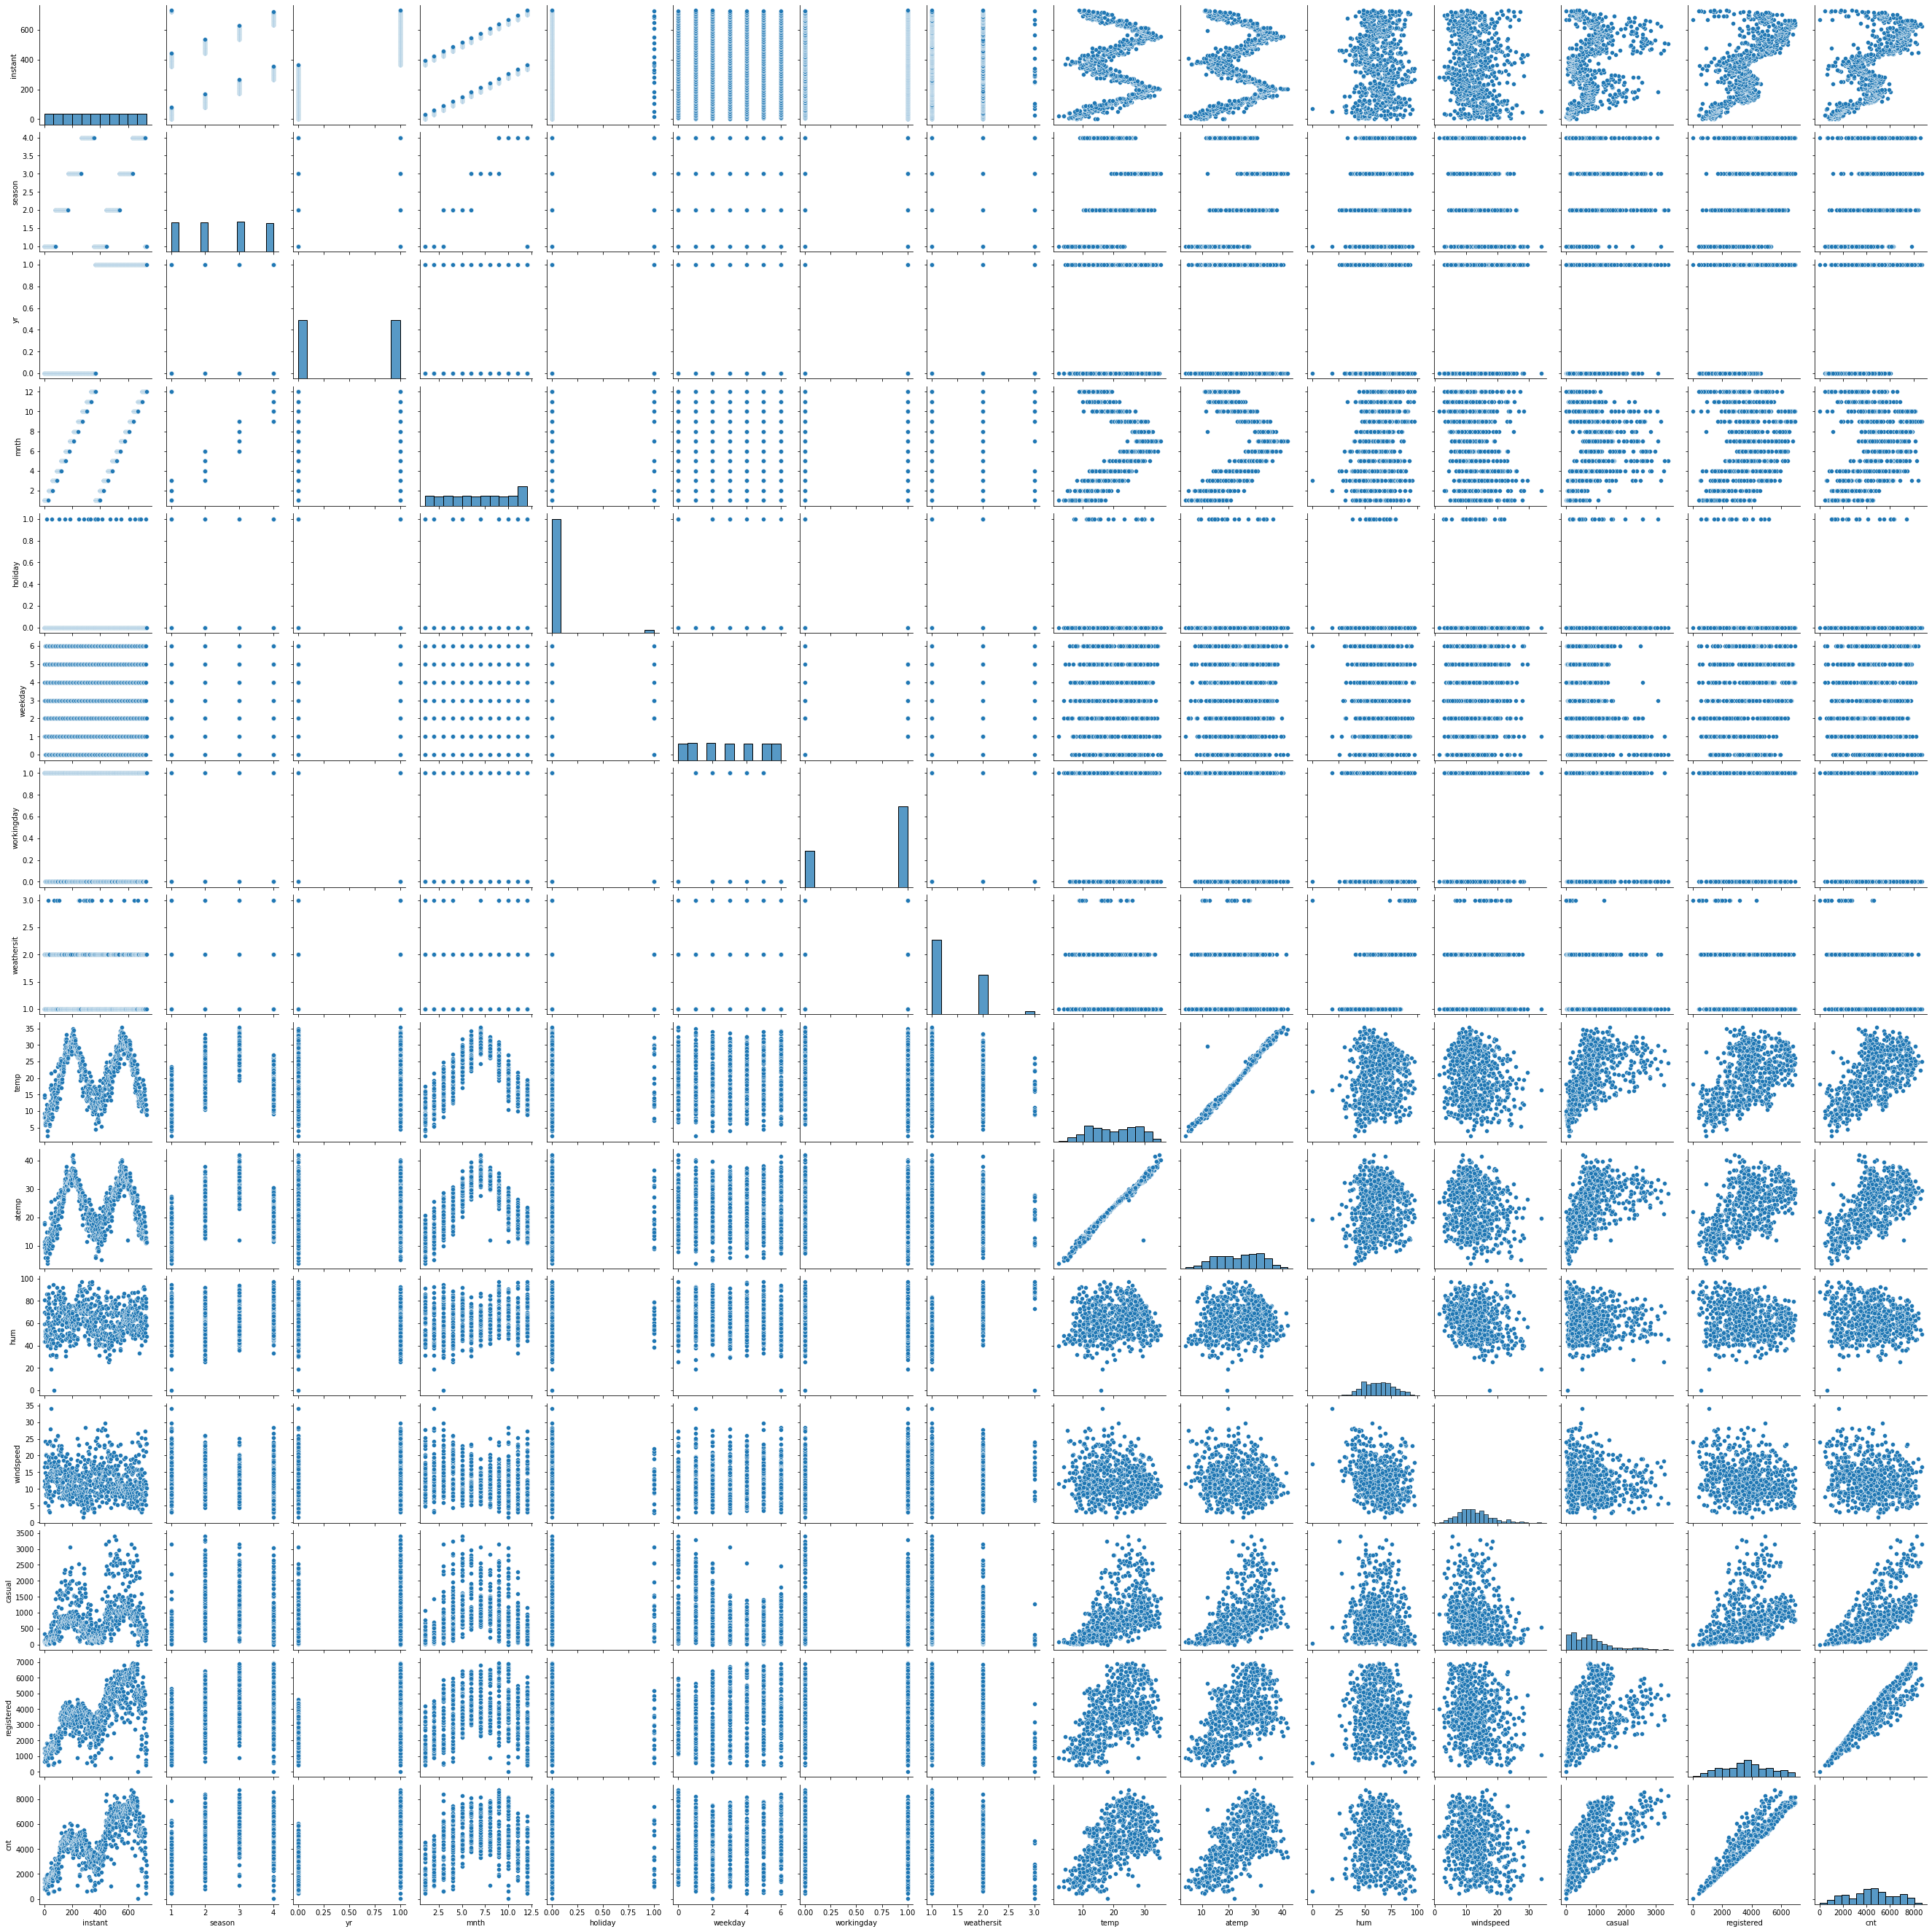

In [92]:
sns.pairplot(dset)
plt.show()

Since the Dataset has many variables, with the Pairplot the correlation between the variables cannot be studied easily

Checking the Correlation between the variables 

In [93]:
dset.corr()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,1.000000,4.135867e-01,8.660262e-01,4.982507e-01,0.016275,-0.001182,-0.015171,-0.021862,0.150738,0.152773,0.016080,-0.112667,0.275604,0.660544,0.629896
season,0.413587,1.000000e+00,-3.279074e-16,8.310321e-01,-0.010868,0.004012,0.017868,0.021306,0.333361,0.342014,0.208220,-0.229607,0.208737,0.410310,0.404584
yr,0.866026,-3.279074e-16,1.000000e+00,-5.162656e-16,0.008195,0.000685,-0.011852,-0.050322,0.048789,0.047215,-0.112547,-0.011624,0.250502,0.596911,0.569728
mnth,0.498251,8.310321e-01,-5.162656e-16,1.000000e+00,0.018905,-0.004059,-0.010414,0.045613,0.219083,0.226430,0.224937,-0.208013,0.121208,0.291952,0.278191
holiday,0.016275,-1.086804e-02,8.195345e-03,1.890483e-02,1.000000,-0.020145,-0.257009,-0.034395,-0.028764,-0.032703,-0.015662,0.006257,0.054055,-0.109142,-0.068764
weekday,-0.001182,4.012478e-03,6.852851e-04,-4.059002e-03,-0.020145,1.000000,0.001588,0.034216,0.044876,0.037964,0.008780,-0.017230,-0.350848,0.199326,0.036183
workingday,-0.015171,1.786841e-02,-1.185197e-02,-1.041372e-02,-0.257009,0.001588,1.000000,-0.026332,0.002044,0.010657,0.053770,-0.002453,-0.090369,0.005466,-0.027640
weathersit,-0.021862,2.130636e-02,-5.032247e-02,4.561335e-02,-0.034395,0.034216,-0.026332,1.000000,-0.119503,-0.120559,0.590277,0.039769,-0.246044,-0.259025,-0.295929
temp,0.150738,3.333607e-01,4.878919e-02,2.190833e-01,-0.028764,0.044876,0.002044,-0.119503,1.000000,0.991696,0.128565,-0.158186,0.542731,0.539436,0.627044
atemp,0.152773,3.420139e-01,4.721519e-02,2.264302e-01,-0.032703,0.037964,0.010657,-0.120559,0.991696,1.000000,0.141512,-0.183876,0.543362,0.543678,0.630685


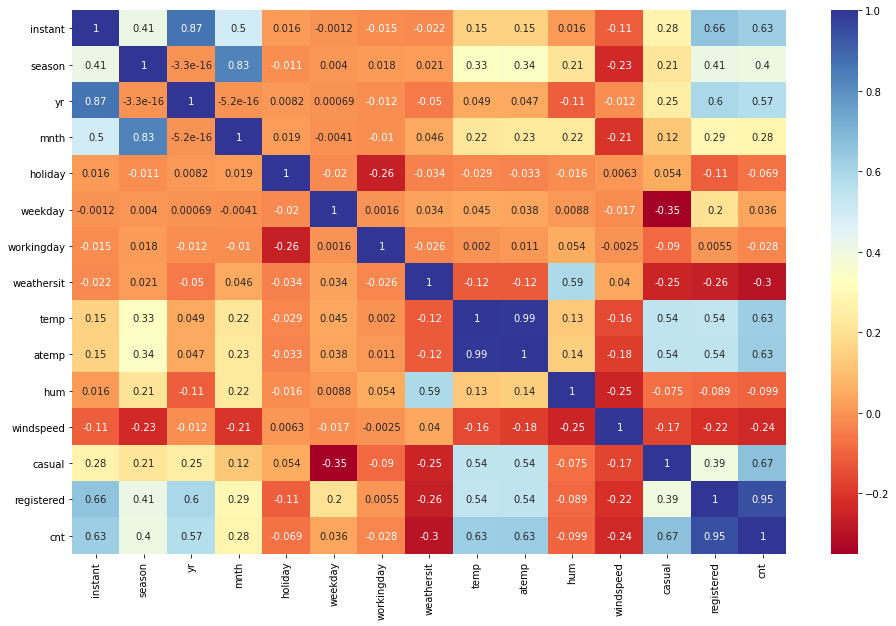

In [94]:
#checking the correlation through a heat-map 
plt.figure(figsize= (16,10))
sns.heatmap(dset.corr(), annot=True, cmap = "RdYlBu")
plt.show()

## Step 2: Data Pre-processing

Since the column 'cnt' is a sum of 'casual' and 'registered', we can choose 'cnt' as the Target variable and they can be dropped. 

Also the columns 'instant' and 'dteday' can be dropped as they will not have any effect in the Model building. 

In [95]:
#Dropping the said columns 
dset = dset.drop(['instant','dteday','casual','registered'], axis = 1)

In [96]:
dset.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


The columns month, weekday, season, weathersit are Numeric in nature. But they would affect while model building as they behave as a numerical variables rather than as categorical varaibles. So replacing the numbers with the name of the days and name of the month

In [97]:
#Replacing the values 1,2,3....,6 of column weekdays as names of weekdays
#Replacing the values 1,2,3....,12 of column mnth as names of months
#Replacing the values 1,2,3 and 4 of column weathersit as weather
#Replacing the values 1,2,3 and 4 of column Season as names of seaons 

dset.weekday = dset.weekday.replace({1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat',0:'Sun'})
dset.mnth = dset.mnth.replace({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})

In [98]:
dset.season.replace({1:'Spring',2:'Summer',3:'Fall',4:'Winter'},inplace = True)
dset.weathersit.replace({1:'clear',2:'cloudy',3:'Light Prec.',4:'Heavy Prec.'}, inplace = True)


In [99]:
dset.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,Jan,0,Mon,1,cloudy,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,Jan,0,Tue,1,cloudy,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,Jan,0,Wed,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,Jan,0,Thu,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,Jan,0,Fri,1,clear,9.305237,11.46350,43.6957,12.522300,1600


## Step 3: Exploratory Data Analysis

Checking the Target Variable - cnt and the predictor variables that affect it using scatter plot 

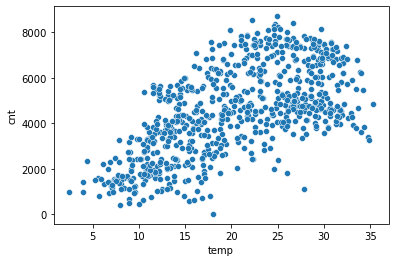

In [100]:
#Scatter plot cnt vs temperature
sns.scatterplot(x = 'temp', y = 'cnt', data = dset)
plt.show()

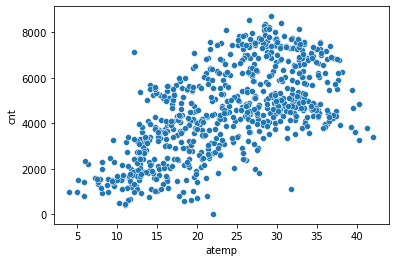

In [101]:
#Scatter plot cnt vs atemperature - Feeling temperature in deg C
sns.scatterplot(x = 'atemp', y = 'cnt', data = dset)
plt.show()

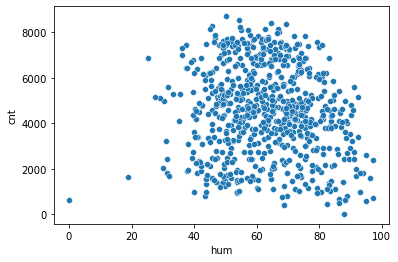

In [102]:
#Scatter plot cnt vs humidity
sns.scatterplot(x = 'hum', y = 'cnt', data = dset)
plt.show()

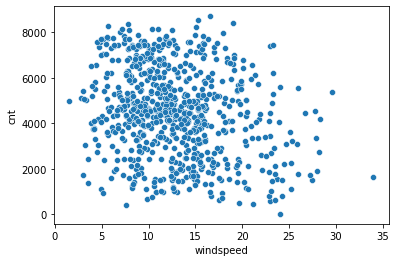

In [103]:
#Scatter plot cnt vs humidity
sns.scatterplot(x = 'windspeed', y = 'cnt', data = dset)
plt.show()

On viewing the above mentioned scatter plots, it can be inferred that there is a pattern between Numerical parameters of weather and count. 



## Step 4: Data Preparation for Modelling 

Creating Dummy variables for the Categorical variables 

In [104]:
#Dummy variables for Season
dummy = pd.get_dummies(dset['season'])
dummy.head()

,Fall,Spring,Summer,Winter
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0


Since when there are n variables there will be n-1 dummy variables, here the drop_first function is used to drop the redundant dummy variables

In [105]:
dummy = pd.get_dummies(dset['season'], drop_first = True)

In [106]:
dummy.shape

(730, 3)

In [107]:
#Dummy variables for month
dummy1 = pd.get_dummies(dset['mnth'], drop_first = True)
dummy1.head()

,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0


In [108]:
dummy1.shape

(730, 11)

In [109]:
#Dummy variables for weekday
dummy2 = pd.get_dummies(dset['weekday'], drop_first = True)
dummy2.head()

,Mon,Sat,Sun,Thu,Tue,Wed
0,1,0,0,0,0,0
1,0,0,0,0,1,0
2,0,0,0,0,0,1
3,0,0,0,1,0,0
4,0,0,0,0,0,0


In [110]:
dummy2.shape

(730, 6)

In [111]:
#Dummy variables for weathersit
dummy3 = pd.get_dummies(dset['weathersit'], drop_first = True)
dummy3.head()

,clear,cloudy
0,0,1
1,0,1
2,1,0
3,1,0
4,1,0


In [112]:
dummy3.shape

(730, 2)

In [113]:
#concatenating the all the datasets of the dummy variables 
dummy_var = pd.concat([dummy,dummy1,dummy2,dummy3], axis = 1)
dummy_var.head()

,Spring,Summer,Winter,Aug,Dec,Feb,Jan,Jul,Jun,Mar,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,clear,cloudy
0,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
2,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,1,0
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [114]:
#checking the shape of Dummy variable dataset
dummy_var.shape

(730, 22)

In [115]:
#Merging the main dataset and dataset of dummy variables 
dset = pd.concat([dset, dummy_var], axis = 1)

In [116]:
#Checking the shape of the dataset 
dset.shape

(730, 34)

In [117]:
#Checking the dataset 
dset.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,clear,cloudy
0,Spring,0,Jan,0,Mon,1,cloudy,14.110847,18.18125,80.5833,...,0,0,1,0,0,0,0,0,0,1
1,Spring,0,Jan,0,Tue,1,cloudy,14.902598,17.68695,69.6087,...,0,0,0,0,0,0,1,0,0,1
2,Spring,0,Jan,0,Wed,1,clear,8.050924,9.47025,43.7273,...,0,0,0,0,0,0,0,1,1,0
3,Spring,0,Jan,0,Thu,1,clear,8.200000,10.60610,59.0435,...,0,0,0,0,0,1,0,0,1,0
4,Spring,0,Jan,0,Fri,1,clear,9.305237,11.46350,43.6957,...,0,0,0,0,0,0,0,0,1,0


In [118]:
#Dropping the Columns of the categorical variables as the dummy variables have been created 
dset.drop(['season','mnth','weekday','weathersit'], axis=1, inplace=True)

In [119]:
dset.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Spring,Summer,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,clear,cloudy
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,0,0,1,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,0,0,0,0,0,1,1,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,1,0,0,1,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,0,1,0


## Step 4: Splitting the Data into Training and Testing dataset

In [120]:
from sklearn.model_selection import train_test_split

np.random.seed(0)
df_train, df_test = train_test_split(dset, train_size = 0.7, test_size = 0.3, random_state = 100)

In [121]:
#checking the shapes of the Training and Test Set 
print(df_train.shape)
print(df_test.shape)

(510, 30)
(219, 30)


Rescalling the numerical variables into a single scale between 0 and 1. As seen from the dataset, columns temp, atemp, hum, windspeed and cnt are in a different scale when compared to the other ones. So it is extremely important to rescale the variables so that they have a comparable scale. If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients. This would make the model evaluation undecipherable. 

Rescalling the variables using MinMax Scaling method:

In [122]:
from sklearn.preprocessing import MinMaxScaler

In [123]:
scaler = MinMaxScaler()

In [124]:
num_vars = ['temp','atemp','hum','windspeed','cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [125]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Spring,Summer,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,clear,cloudy
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,...,1,0,0,0,0,0,0,1,1,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,0,0,0,1,1,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,0,0,1,0,0,0,0,1
728,1,0,1,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,...,0,0,1,0,0,0,0,0,1,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,0,0,1,0,0,0,0,1


In [126]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Spring,Summer,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,clear,cloudy
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.537262,0.512989,0.650369,0.320768,0.513620,0.243137,0.245098,...,0.086275,0.080392,0.154902,0.129412,0.137255,0.143137,0.152941,0.135294,0.627451,0.343137
std,0.500429,0.157763,0.453386,0.225844,0.212385,0.145882,0.169797,0.224593,0.429398,0.430568,...,0.281045,0.272166,0.362166,0.335985,0.344454,0.350557,0.360284,0.342373,0.483958,0.475223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [127]:
df_train.corr()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Spring,Summer,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,clear,cloudy
yr,1.000000,-0.014980,-0.003005,0.107288,0.104206,-0.084792,-0.001108,0.591508,-0.036320,0.013856,...,-0.018790,0.002574,-0.033817,-0.017733,0.016537,0.032785,0.026024,0.010995,0.036425,-0.015469
holiday,-0.014980,1.000000,-0.254149,-0.066282,-0.070640,-0.029093,0.017569,-0.095961,0.053339,-0.063232,...,-0.005387,0.043692,-0.069242,-0.025291,-0.028355,-0.066102,0.034971,0.190636,0.047427,-0.038279
workingday,-0.003005,-0.254149,1.000000,-0.007643,0.003814,0.020701,-0.002504,-0.008723,-0.032886,0.030488,...,0.025939,-0.034746,0.272446,-0.605864,-0.626783,0.260091,0.234321,0.163120,0.064783,-0.068924
temp,0.107288,-0.066282,-0.007643,1.000000,0.989537,0.155415,-0.187396,0.643517,-0.605988,0.125582,...,-0.018709,0.207457,-0.037708,0.025276,0.006854,0.074973,-0.001951,-0.046291,0.101146,-0.090161
atemp,0.104206,-0.070640,0.003814,0.989537,1.000000,0.169461,-0.215283,0.646475,-0.610741,0.135806,...,-0.005262,0.206157,-0.036829,0.012090,0.006359,0.078627,0.002815,-0.043377,0.099984,-0.086069
hum,-0.084792,-0.029093,0.020701,0.155415,0.169461,1.000000,-0.266895,-0.059993,-0.201134,-0.013216,...,0.162014,0.152628,-0.030499,0.002783,-0.027388,-0.056997,0.033548,0.026395,-0.557990,0.481042
windspeed,-0.001108,0.017569,-0.002504,-0.187396,-0.215283,-0.266895,1.000000,-0.253794,0.180743,0.110089,...,-0.018973,-0.121734,0.035390,-0.016284,0.018278,-0.021502,0.035616,-0.057518,-0.000531,-0.030385
cnt,0.591508,-0.095961,-0.008723,0.643517,0.646475,-0.059993,-0.253794,1.000000,-0.548871,0.134343,...,0.065692,0.201327,-0.071188,0.012496,0.031237,0.110430,-0.018885,-0.019578,0.251548,-0.175530
Spring,-0.036320,0.053339,-0.032886,-0.605988,-0.610741,-0.201134,0.180743,-0.548871,1.000000,-0.322955,...,-0.174161,-0.167580,0.010007,-0.000641,0.013022,-0.048931,-0.012251,0.002987,0.001854,0.013970
Summer,0.013856,-0.063232,0.030488,0.125582,0.135806,-0.013216,0.110089,0.134343,-0.322955,1.000000,...,-0.175089,-0.168473,-0.017169,-0.002397,-0.015325,0.066484,-0.001490,-0.012151,-0.022924,0.039442


## Dividing the set into X and y sets for Model building

In [128]:
#y_train has only the variable cnt while X_train has all the other variables except cnt 
y_train = df_train.pop('cnt')
X_train = df_train

In [129]:
#checking the head of y_train
y_train.head()

653    0.864243
576    0.827658
426    0.465255
728    0.204096
482    0.482973
Name: cnt, dtype: float64

In [130]:
#checking the head of X_train
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,Spring,Summer,Winter,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,clear,cloudy
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0,0,1,...,1,0,0,0,0,0,0,1,1,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0,0,0,...,0,0,0,0,0,0,0,1,1,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,1,0,0,...,0,0,0,0,1,0,0,0,0,1
728,1,0,1,0.245101,0.200348,0.498067,0.663106,1,0,0,...,0,0,1,0,0,0,0,0,1,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0,1,0,...,0,0,0,0,1,0,0,0,0,1


## Recursive Feature Elimination

An Mixed approach is about to be followed for Model building. 

That is going to be done using RFE Method which means Recursive Feature Elimination. 

It is an example of mixed approach because it involves both automated feature selection and manual feature elimination. Since it involves both automation and manual involvement, it is one of the best suitable methods.


In [131]:
#Importing the necessary libraries for RFE. RFE is available in SciKit Learn library.
from sklearn.feature_selection import RFE 
from sklearn.linear_model import LinearRegression

In [132]:
#Running RFE with the output number of variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)
rfe = rfe.fit(X_train, y_train)

In [133]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 3),
 ('temp', True, 1),
 ('atemp', False, 6),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('Spring', True, 1),
 ('Summer', True, 1),
 ('Winter', True, 1),
 ('Aug', False, 10),
 ('Dec', True, 1),
 ('Feb', False, 2),
 ('Jan', True, 1),
 ('Jul', True, 1),
 ('Jun', False, 14),
 ('Mar', False, 15),
 ('May', False, 7),
 ('Nov', True, 1),
 ('Oct', False, 12),
 ('Sep', True, 1),
 ('Mon', False, 9),
 ('Sat', False, 4),
 ('Sun', False, 5),
 ('Thu', False, 13),
 ('Tue', False, 8),
 ('Wed', False, 11),
 ('clear', True, 1),
 ('cloudy', True, 1)]

In [134]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'Spring', 'Summer',
       'Winter', 'Dec', 'Jan', 'Jul', 'Nov', 'Sep', 'clear', 'cloudy'],
      dtype='object')

In [135]:
X_train.columns[~rfe.support_]


Index(['workingday', 'atemp', 'Aug', 'Feb', 'Jun', 'Mar', 'May', 'Oct', 'Mon',
       'Sat', 'Sun', 'Thu', 'Tue', 'Wed'],
      dtype='object')

Now considering only the columns suggested by the automated RFE Method which are 'yr', 'holiday', 'temp', 'hum', 'windspeed', 'Spring', 'Summer', 'Winter', 'Dec', 'Jan', 'Jul', 'Nov', 'Sep', 'clear' and 'cloudy'

## Building the model for detailed statistics 

In [136]:
#Model building using statsmodels 
import statsmodels.api as sm 
X_train_rfe = X_train[col]

In [137]:
#Adding constant variable
X_train_rfe = sm.add_constant(X_train_rfe)

In [138]:
lm = sm.OLS(y_train, X_train_rfe).fit() 

In [139]:
#Printing the Statistic Summary of the Model 
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     180.2
Date:                Wed, 08 Dec 2021   Prob (F-statistic):          3.34e-189
Time:                        22:40:25   Log-Likelihood:                 514.72
No. Observations:                 510   AIC:                            -997.4
Df Residuals:                     494   BIC:                            -929.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0721      0.047      1.519      0.1

Looking at the P values of the variables few of them are higher than 0 which makes those Variables insignificant. 

So the following variables are to be dropped. 

Spring, Summer, Dec, Jan, Jul and Nov 

## Checking VIF 

Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. 

The formula for calculating VIF is:


### $ VIF_i = \frac{1}{1 - {R_i}^2} $

In [140]:
#importing the required libraries for VIF 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [141]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range (X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,442.76
4,atemp,382.24
2,workingday,82.92
5,hum,38.87
27,clear,25.37
23,Sun,16.31
22,Sat,15.40
7,Spring,13.75
28,cloudy,12.81
9,Winter,12.57


Variables having more than VIF value of 5 means that the variables are highly correlated and they need to be dropped

## Dropping the Insignificant values 

The following variables have high P-values and also High VIF which is higher than 5. So dropping them one by one and updating the model.
       
Spring        
Summer     
Dec        
Jan        
Jul       
Nov etc.

In [142]:
X_train_new = X_train_rfe.drop(["Spring","Summer","Dec","Jan","Jul","Nov"], axis = 1)

Rebuilding the model without the dropped variables 

In [143]:
#Adding a constant variable 
import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_new)

In [144]:
lm = sm.OLS(y_train, X_train_lm).fit() 

In [145]:
#Viewing the summary of the Model 
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     241.5
Date:                Wed, 08 Dec 2021   Prob (F-statistic):          1.00e-175
Time:                        22:40:37   Log-Likelihood:                 466.02
No. Observations:                 510   AIC:                            -912.0
Df Residuals:                     500   BIC:                            -869.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0145      0.046     -0.313      0.7

In [146]:
#Dropping the variable constant as it has high p_value 
X_train_new = X_train_new.drop(['const'], axis=1)

In [147]:
#Calculating the VIF after dropping the values by creating a new Dataframe
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()

X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,17.71
7,clear,9.72
2,temp,8.34
8,cloudy,7.30
4,windspeed,4.07
0,yr,2.06
5,Winter,1.51
6,Sep,1.16
1,holiday,1.04


## Residual Analysis of the Train values 

As per the assumption, the Residue values are normally distributed. Checking the same by plotting the Residue values in a Histogram

In [148]:
y_train_cnt = lm.predict(X_train_lm)

In [149]:
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 0, 'Errors')

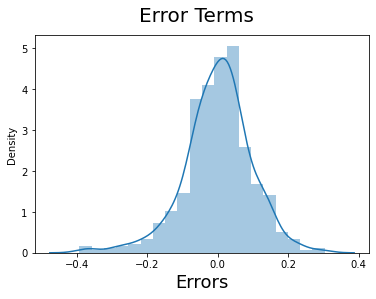

In [150]:
#Plotting the Residual values in a histogram
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label)

From the Distplot above, it is clear that the Residual values are normally distributed

## Predictions 

In [151]:
#Scaling the Test set 
num_vars = ['temp','atemp','hum','windspeed','cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [152]:
#Splitting the Test Set into X and y
y_test = df_test.pop('cnt')
X_test = df_test

In [154]:
#Dropping the already dropped variables in the Test dataset 

X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [155]:
X_test_new.head()

,const,yr,holiday,temp,hum,windspeed,Winter,Sep,clear,cloudy
184,1.0,0,1,0.831783,0.657364,0.084219,0,0,0,1
535,1.0,1,0,0.901354,0.610133,0.153728,0,0,1,0
299,1.0,0,0,0.511964,0.837699,0.334206,1,0,0,1
221,1.0,0,0,0.881625,0.437098,0.339570,0,0,1,0
152,1.0,0,0,0.817246,0.314298,0.537414,0,0,1,0


In [156]:
y_pred = lm.predict(X_test_new)

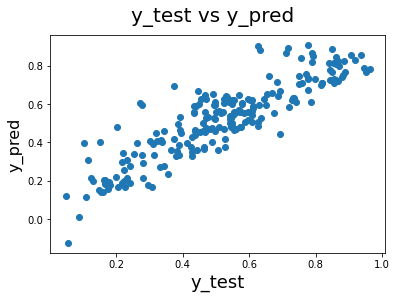

In [158]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)  
plt.show()

In [159]:
lm = sm.OLS(y_test,X_test_new).fit() 

In [160]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.783
Method:                 Least Squares   F-statistic:                     88.33
Date:                Wed, 08 Dec 2021   Prob (F-statistic):           2.87e-66
Time:                        22:49:59   Log-Likelihood:                 194.76
No. Observations:                 219   AIC:                            -369.5
Df Residuals:                     209   BIC:                            -335.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0568      0.086      0.664      0.5

## The final Adjusted R-Squared value of the Train set - 81% and the Test set - 78.3% are found to be close to each other.

